In [ ]:
# Import the libraries required for exploration and preproccesing
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['axes.facecolor'] = 'white'

matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['axes.facecolor'] = 'white'

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Give names to the features
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

# df_train = pd.read_csv(('./CMaps/train_FD001.txt'), sep='\s+', header=None, names=col_names)
# df_test = pd.read_csv(('./CMaps/test_FD001.txt'), sep='\s+', header=None, names=col_names)
# df_test_RUL = pd.read_csv(('./CMaps/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
df_train = pd.read_csv(('/content/drive/My Drive/dataset/14/D1/train_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test = pd.read_csv(('/content/drive/My Drive/dataset/14/D1/test_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('/content/drive/My Drive/dataset/14/D1/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   13096 non-null  int64  
 1   cycle                                    13096 non-null  int64  
 2   setting_1                                13096 non-null  float64
 3   setting_2                                13096 non-null  float64
 4   setting_3                                13096 non-null  float64
 5   (Fan inlet temperature) (◦R)             13096 non-null  float64
 6   (LPC outlet temperature) (◦R)            13096 non-null  float64
 7   (HPC outlet temperature) (◦R)            13096 non-null  float64
 8   (LPT outlet temperature) (◦R)            13096 non-null  float64
 9   (Fan inlet Pressure) (psia)              13096 non-null  float64
 10  (bypass-duct pressure) (psia)            13096

In [ ]:
df_test_RUL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


In [ ]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
(LPC outlet temperature) (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
(HPC outlet temperature) (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
(LPT outlet temperature) (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
(Fan inlet Pressure) (psia),20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [ ]:
# Identify constant columns
constant_features = [col for col in df_train.columns if df_train[col].nunique() == 1]

# Drop constant columns
df_train = df_train.drop(columns=constant_features)
df_test= df_test.drop(columns=constant_features)
print(f"Dropped constant features: {constant_features}")

Dropped constant features: ['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [ ]:
df_train.columns

Index(['engine', 'cycle', 'setting_1', 'setting_2',
       '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)',
       '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)',
       '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)',
       '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Corrected core speed) (rpm)',
       '(Bypass Ratio) ', '(Bleed Enthalpy)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   (LPC outlet temperature) (◦R)            20631 non-null  float64
 5   (HPC outlet temperature) (◦R)            20631 non-null  float64
 6   (LPT outlet temperature) (◦R)            20631 non-null  float64
 7   (bypass-duct pressure) (psia)            20631 non-null  float64
 8   (HPC outlet pressure) (psia)             20631 non-null  float64
 9   (Physical fan speed) (rpm)               20631 non-null  float64
 10  (Physical core speed) (rpm)              20631

In [ ]:
# calculate maximum cycle_time per engine
max_time_cycles = df_train.groupby("engine")["cycle"].max()
# To check result
# for idx, row in max_time_cycles.reset_index().iterrows():
#     print("Engine:", row["engine"], "Failure_time:", row["cycle_time"])
# merge into maximum cycle time into train df
merged = df_train.merge(max_time_cycles.to_frame(name="max_time_cycle"), left_on="engine", right_index=True)
# calculate RUL = maximum cycle time - each cycle time
merged["RUL"] = merged["max_time_cycle"] - merged["cycle"]
# drop maximum cycle time (not used)
merged = merged.drop("max_time_cycle", axis=1)
# update train df with RUL
train_df = merged

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   (LPC outlet temperature) (◦R)            20631 non-null  float64
 5   (HPC outlet temperature) (◦R)            20631 non-null  float64
 6   (LPT outlet temperature) (◦R)            20631 non-null  float64
 7   (bypass-duct pressure) (psia)            20631 non-null  float64
 8   (HPC outlet pressure) (psia)             20631 non-null  float64
 9   (Physical fan speed) (rpm)               20631 non-null  float64
 10  (Physical core speed) (rpm)              20631

In [ ]:
train_df.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [ ]:
train_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
(LPC outlet temperature) (◦R),20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
(HPC outlet temperature) (◦R),20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
(LPT outlet temperature) (◦R),20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
(bypass-duct pressure) (psia),20631.0,21.609803,0.001389,21.6000,21.6100,21.6100,21.6100,21.6100
(HPC outlet pressure) (psia),20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
(Physical fan speed) (rpm),20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600


In [ ]:
pip install pennylane

Mean Squared Error: 2100.6520


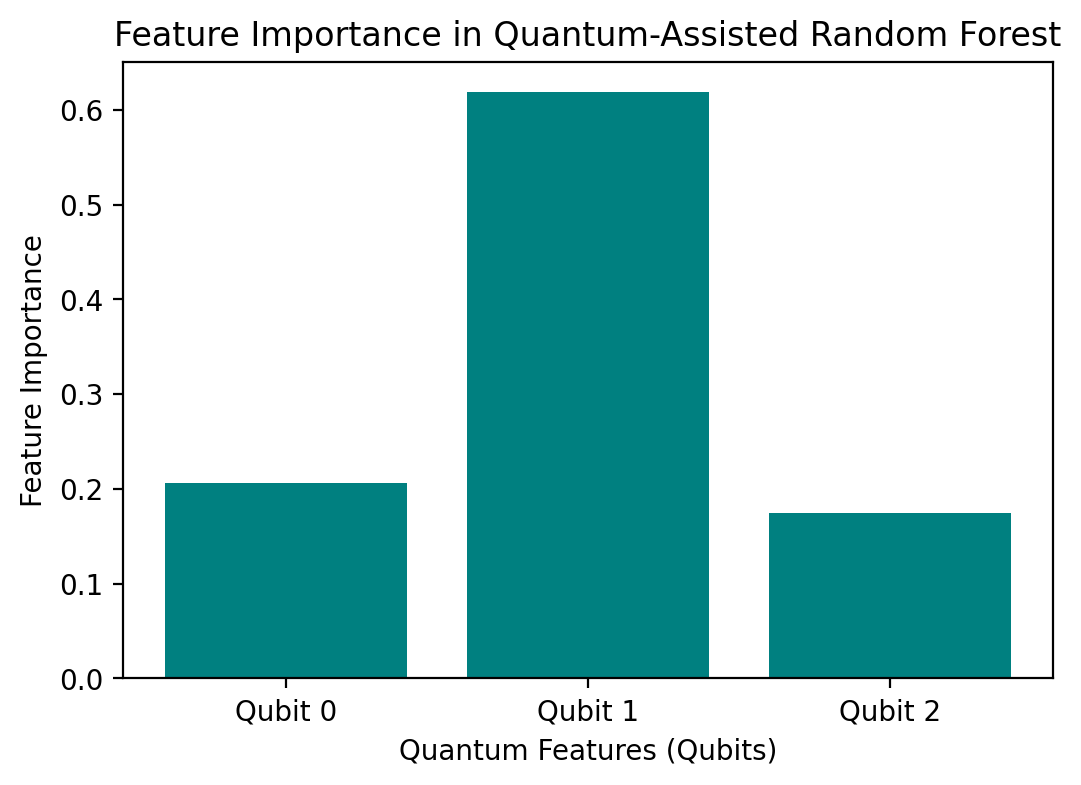

In [ ]:
import pennylane as qml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define Quantum Circuit for Feature Encoding
n_qubits = 3  # Number of qubits (should match feature size)
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_feature_map(x):
    """Quantum embedding circuit to encode features."""
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)  # Encoding via RY rotations
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Function to Encode Data using Quantum Circuit
def quantum_transform(X):
    """Applies quantum feature encoding to dataset."""
    return np.array([quantum_feature_map(x) for x in X])

# Sample Dataset (California Housing)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = train_df.drop(columns=["RUL"])  # Drop the target column to get features
y = train_df["RUL"]

# Select first n_qubits features for simplicity
X = X.iloc[:, :n_qubits]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Quantum Feature Map
X_train_q = quantum_transform(X_train.values)
X_test_q = quantum_transform(X_test.values)

# Train Classical Random Forest on Quantum Transformed Features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_q, y_train)

# Predictions
y_pred = rf_model.predict(X_test_q)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Feature Importance Plot
importances = rf_model.feature_importances_
plt.figure(figsize=(6, 4))
plt.bar(range(n_qubits), importances, tick_label=[f'Qubit {i}' for i in range(n_qubits)], color="teal")
plt.xlabel("Quantum Features (Qubits)")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Quantum-Assisted Random Forest")
plt.show()


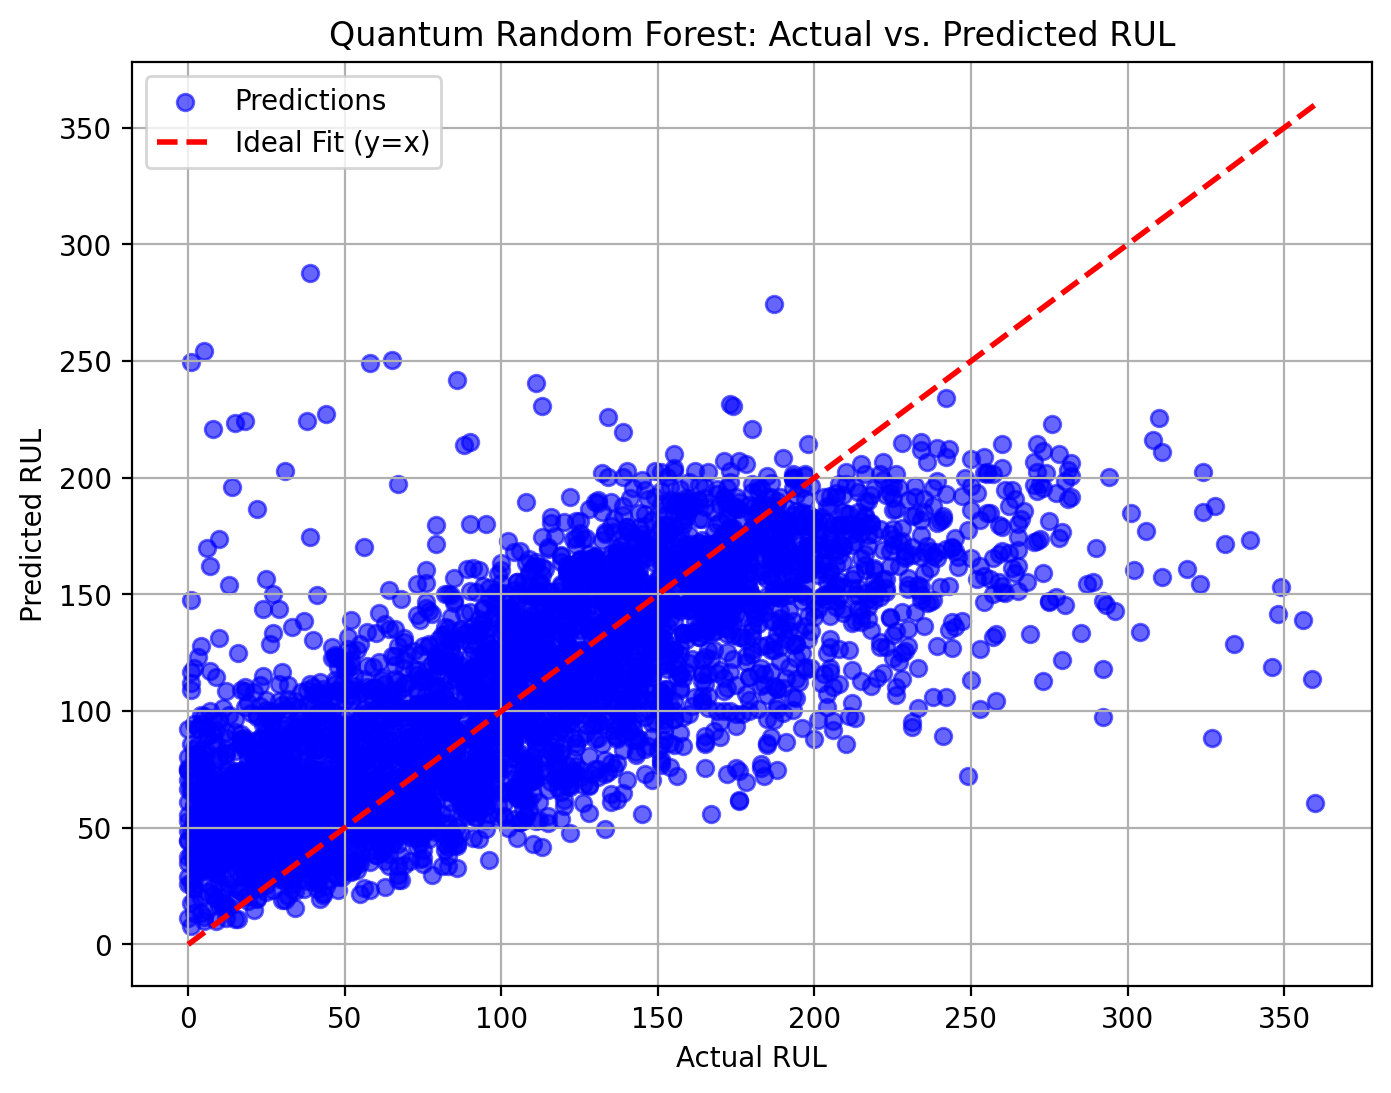

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit (y=x)")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Quantum Random Forest: Actual vs. Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()

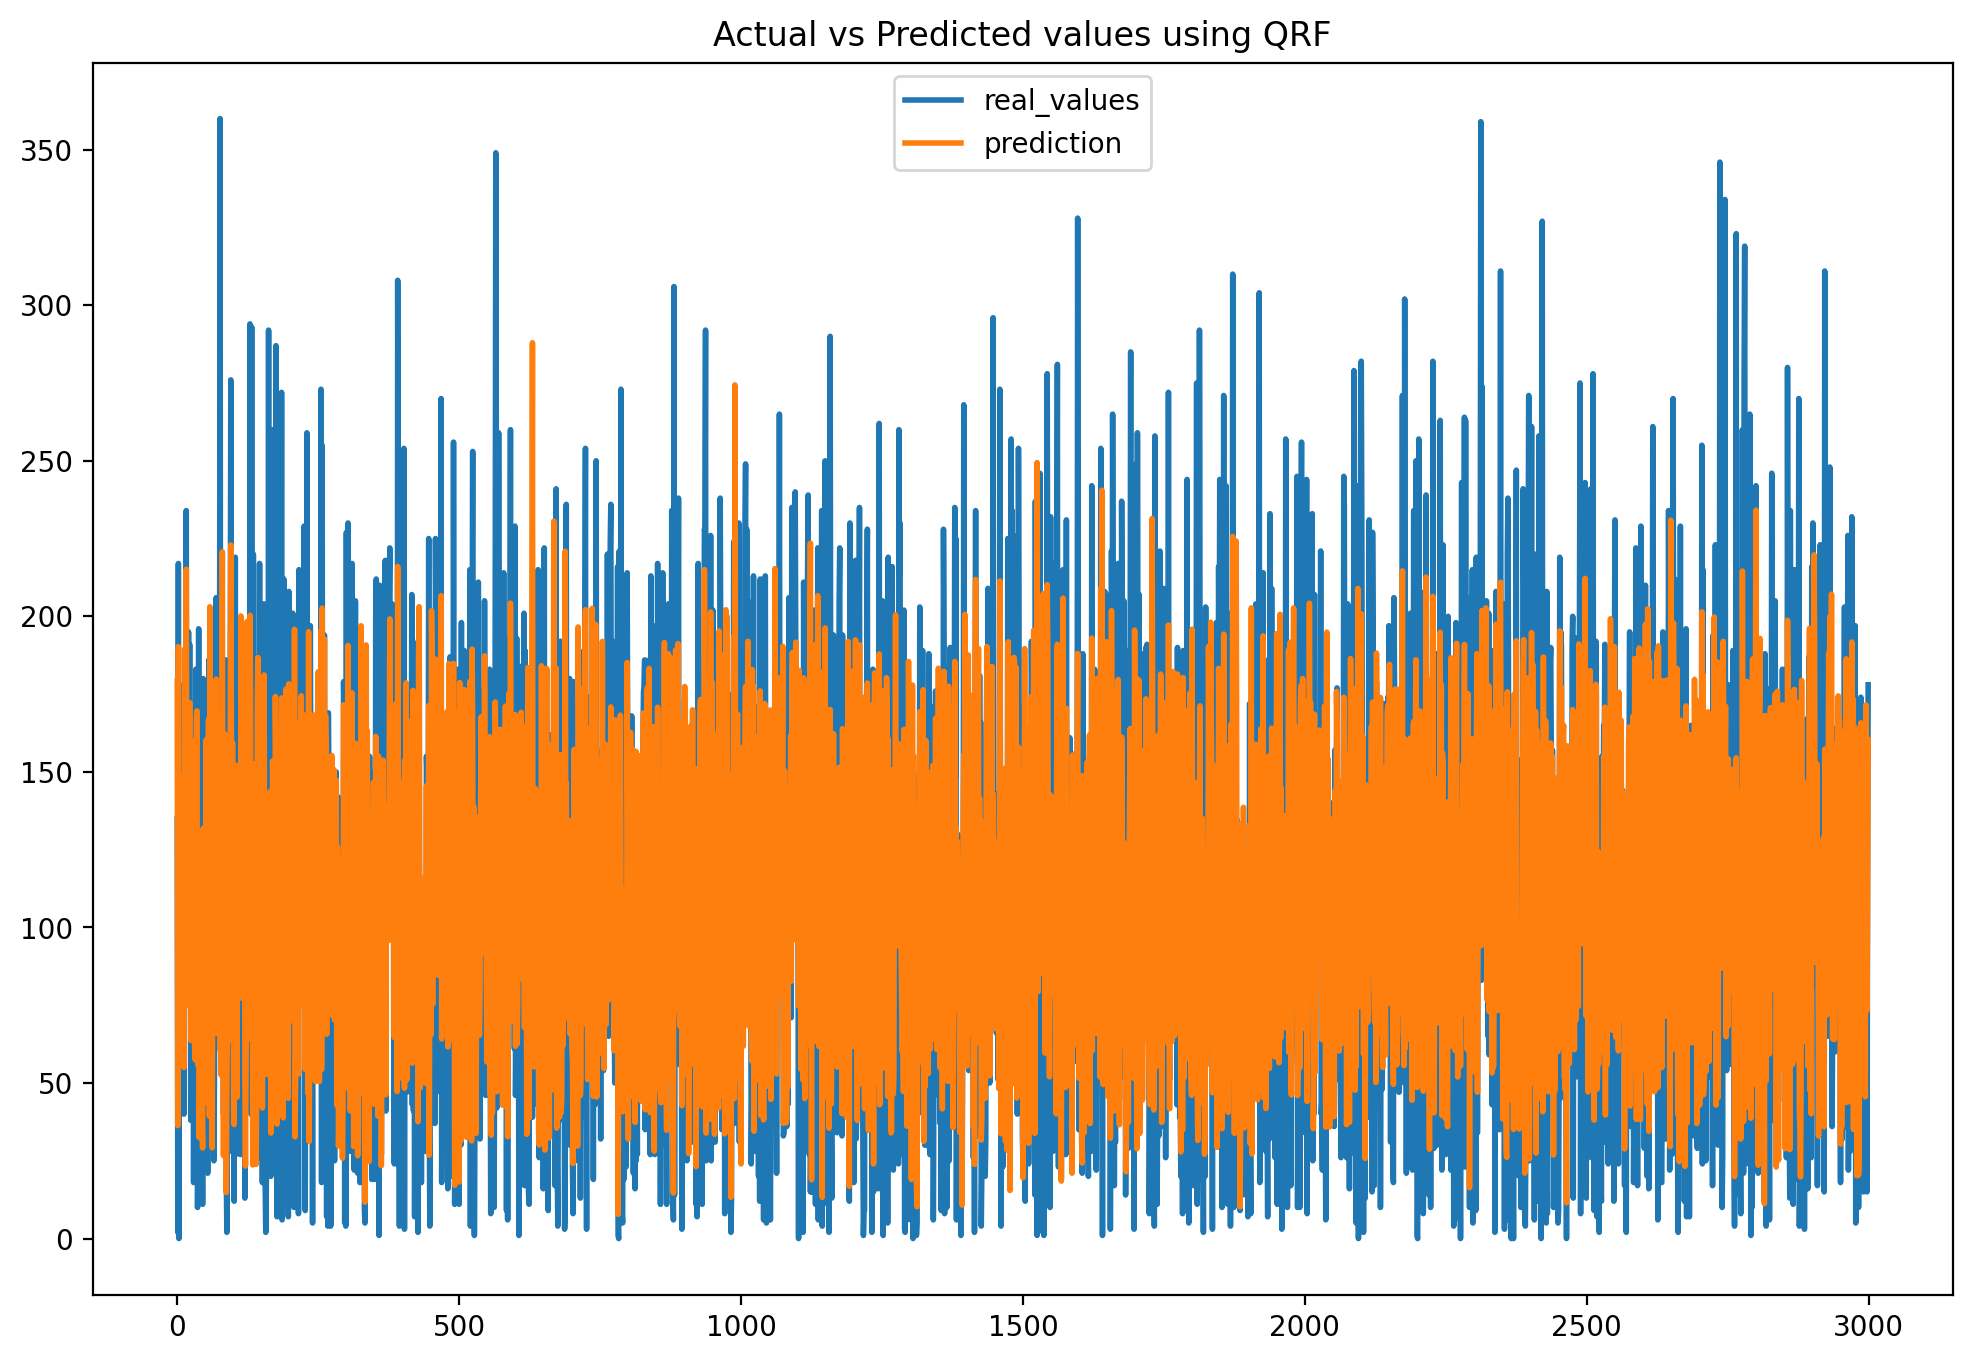

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test[:3000].values, label="real_values", linewidth=2.0)
plt.plot(y_pred[:3000], label="prediction", linewidth=2.0)

plt.legend(loc="best")
plt.title('Actual vs Predicted values using QRF')
plt.savefig('QRF_real_pred.png')
plt.show()

In [ ]:
# prompt: quantum decision tree code

import pennylane as qml
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define Quantum Circuit for Feature Encoding
n_qubits = 3  # Number of qubits (should match feature size)
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_feature_map(x):
    """Quantum embedding circuit to encode features."""
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)  # Encoding via RY rotations
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Function to Encode Data using Quantum Circuit
def quantum_transform(X):
    """Applies quantum feature encoding to dataset."""
    return np.array([quantum_feature_map(x) for x in X])

# Sample Dataset (replace with your actual data)
# Example data:
X = np.random.rand(100, 3) # 100 samples, 3 features
y = np.random.rand(100) # 100 target values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Quantum Feature Map
X_train_q = quantum_transform(X_train)
X_test_q = quantum_transform(X_test)

# Train Classical Random Forest on Quantum Transformed Features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_q, y_train)

# Predictions
y_pred = rf_model.predict(X_test_q)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# (Optional) Visualization (requires matplotlib)
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Quantum Decision Tree Regression")
plt.show()

In [ ]:
X = train_df.drop(columns=["RUL"])  # Drop the target column to get features
y = train_df["RUL"]

In [ ]:
!pip uninstall qiskit -y
!pip uninstall qiskit-terra -y
!pip uninstall qiskit-machine-learning -y

Found existing installation: qiskit 1.3.2
Uninstalling qiskit-1.3.2:
  Successfully uninstalled qiskit-1.3.2
Found existing installation: qiskit-machine-learning 0.8.2
Uninstalling qiskit-machine-learning-0.8.2:
  Successfully uninstalled qiskit-machine-learning-0.8.2


In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import qiskit
print(qiskit.__version__)

1.3.2


In [ ]:
!pip install qiskit-aer

In [ ]:
train_df1 = train_df[:60]

In [ ]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   60 non-null     int64  
 1   cycle                                    60 non-null     int64  
 2   setting_1                                60 non-null     float64
 3   setting_2                                60 non-null     float64
 4   (LPC outlet temperature) (◦R)            60 non-null     float64
 5   (HPC outlet temperature) (◦R)            60 non-null     float64
 6   (LPT outlet temperature) (◦R)            60 non-null     float64
 7   (bypass-duct pressure) (psia)            60 non-null     float64
 8   (HPC outlet pressure) (psia)             60 non-null     float64
 9   (Physical fan speed) (rpm)               60 non-null     float64
 10  (Physical core speed) (rpm)              60 non-null

Results for Quantum SVM on RUL Prediction:
R² Score: 0.0000
Mean Squared Error (MSE): 394.6479
Root Mean Squared Error (RMSE): 19.8657
Mean Absolute Error (MAE): 18.3841
Mean Absolute Percentage Error (MAPE): 0.1151
Mean Absolute Deviation (MAD): 18.3841
Mean Bias Deviation (MBD): 0.1332


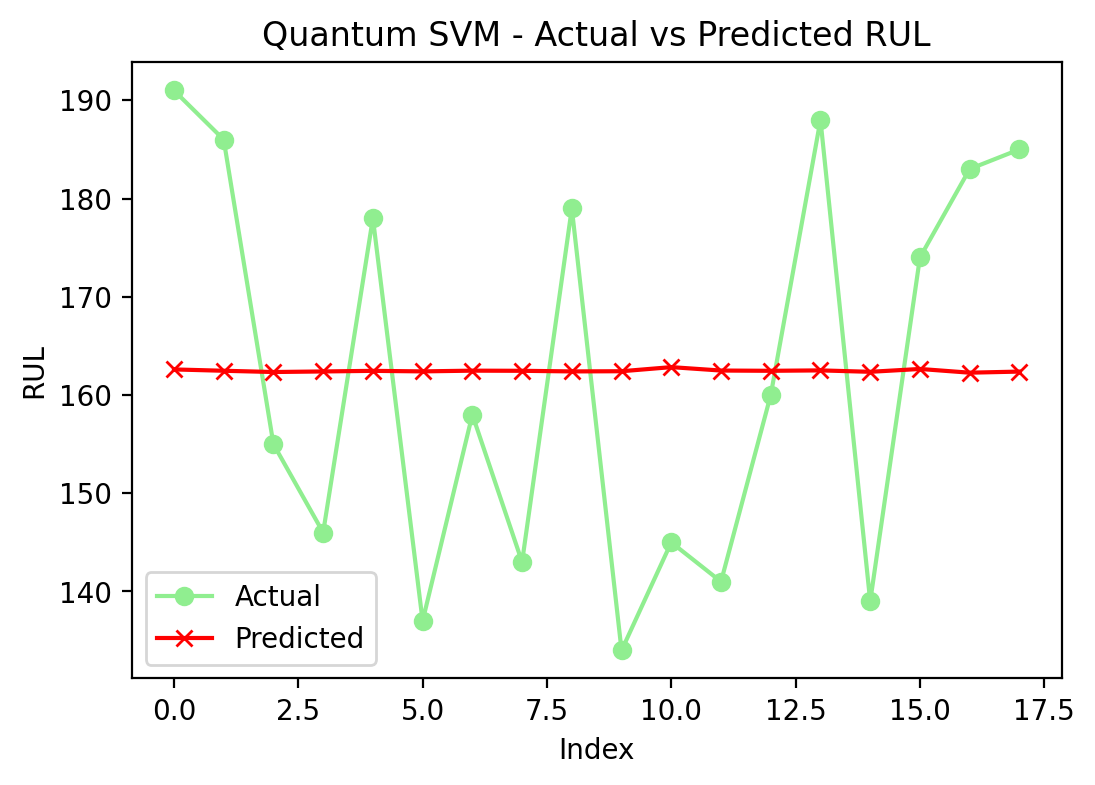

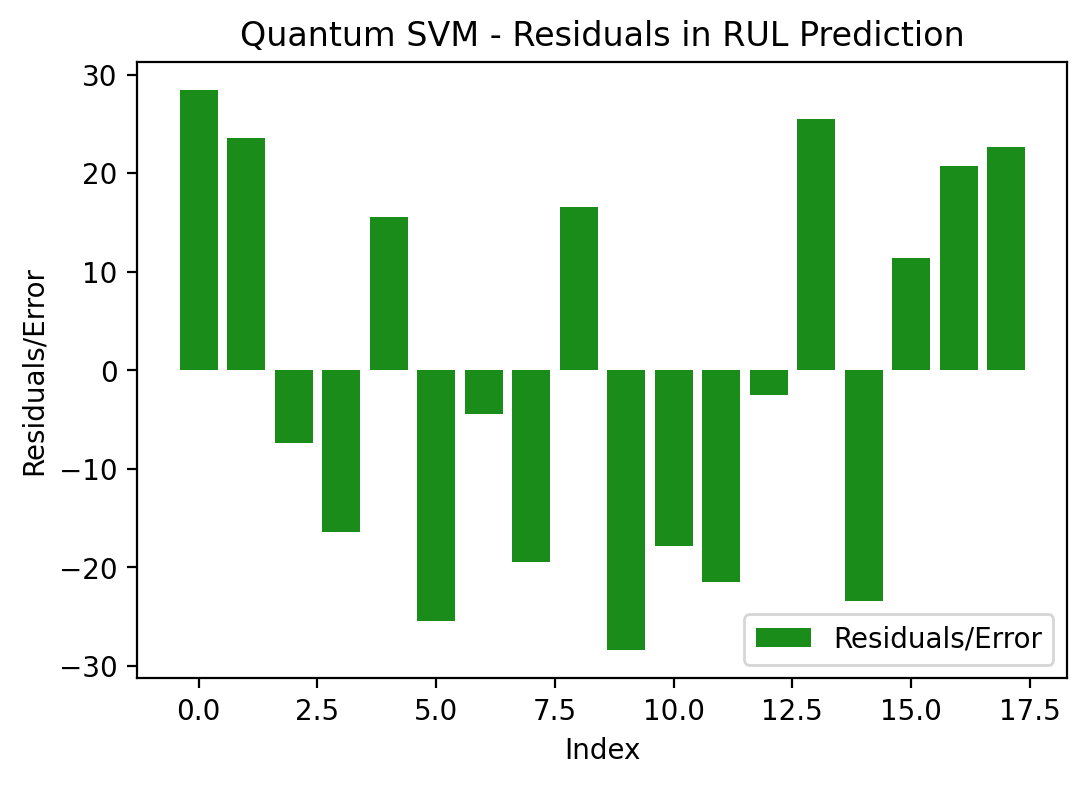

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
X = train_df1.drop(columns=["RUL"])  # Features
y = train_df1["RUL"]  # Target variable

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the quantum feature map as a parameterized circuit
feature_dim = X_train.shape[1]  # Number of features
feature_params = ParameterVector('x', feature_dim)

quantum_feature_map = QuantumCircuit(feature_dim)
for i in range(feature_dim):
    quantum_feature_map.h(i)
    quantum_feature_map.rz(feature_params[i] * np.pi, i)

# Set up the Quantum Kernel
quantum_kernel = FidelityQuantumKernel(feature_map=quantum_feature_map)

# Train a Support Vector Regressor with Quantum Kernel
qsvm_model = SVR(kernel=lambda X1, X2: quantum_kernel.evaluate(X1, X2))

# Fit the model
qsvm_model.fit(X_train.values, y_train)

# Predict and evaluate
y_pred = qsvm_model.predict(X_test.values)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_pred - y_test))

# Mean Bias Deviation (MBD)
mbd = np.mean(y_pred - y_test)

# Print evaluation metrics
print(f"Results for Quantum SVM on RUL Prediction:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Deviation (MAD): {mad:.4f}")
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")

# Calculate Residuals (Error)
residuals = y_test.values - y_pred

# Plot Actual vs Predicted values
plt.figure(figsize=(6, 4))
plt.plot(y_test.values, label='Actual', marker='o', color='lightgreen', linestyle='-')  # Adjusted for user preference
plt.plot(y_pred, label='Predicted', marker='x', color='red', linestyle='-')
plt.title("Quantum SVM - Actual vs Predicted RUL")
plt.xlabel("Index")
plt.ylabel("RUL")
plt.legend()
plt.grid(False)
plt.show()

# Plot Residuals/Error
plt.figure(figsize=(6, 4))
plt.bar(np.arange(len(residuals)), residuals, color='g', alpha=0.9, label='Residuals/Error')
plt.title("Quantum SVM - Residuals in RUL Prediction")
plt.xlabel("Index")
plt.ylabel("Residuals/Error")
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
train_df2 = train_df[:400]

In [ ]:
pip install qiskit

In [ ]:
!pip install qiskit-machine-learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
X = train_df2.drop(columns=["RUL"])  # Features
y = train_df2["RUL"]  # Target variable

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the quantum feature map as a parameterized circuit
feature_dim = X_train.shape[1]  # Number of features
feature_params = ParameterVector('x', feature_dim)

quantum_feature_map = QuantumCircuit(feature_dim)
for i in range(feature_dim):
    quantum_feature_map.h(i)
    quantum_feature_map.rz(feature_params[i] * np.pi, i)

# Set up the Quantum Kernel
quantum_kernel = FidelityQuantumKernel(feature_map=quantum_feature_map)

# Train a Support Vector Regressor with Quantum Kernel
qsvm_model = SVR(kernel=lambda X1, X2: quantum_kernel.evaluate(X1, X2))

# Fit the model
qsvm_model.fit(X_train.values, y_train)

# Predict and evaluate
y_pred = qsvm_model.predict(X_test.values)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_pred - y_test))

# Mean Bias Deviation (MBD)
mbd = np.mean(y_pred - y_test)

# Print evaluation metrics
print(f"Results for Quantum SVM on RUL Prediction:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Deviation (MAD): {mad:.4f}")
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")

# Calculate Residuals (Error)
residuals = y_test.values - y_pred

# Plot Actual vs Predicted values
plt.figure(figsize=(6, 4))
plt.plot(y_test.values, label='Actual', marker='o', color='lightgreen', linestyle='-')  # Adjusted for user preference
plt.plot(y_pred, label='Predicted', marker='x', color='red', linestyle='-')
plt.title("Quantum SVM - Actual vs Predicted RUL")
plt.xlabel("Index")
plt.ylabel("RUL")
plt.legend()
plt.grid(False)
plt.show()

# Plot Residuals/Error
plt.figure(figsize=(6, 4))
plt.bar(np.arange(len(residuals)), residuals, color='g', alpha=0.9, label='Residuals/Error')
plt.title("Quantum SVM - Residuals in RUL Prediction")
plt.xlabel("Index")
plt.ylabel("Residuals/Error")
plt.legend()
plt.grid(False)
plt.show()
